In [147]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import re

# Load JSON File

In [34]:
with open('/Users/Victoria_G/Desktop/CS109B/proj/movie_project/data/drv_imdb_movie_details.json') as f:
    data = json.load(f)
imdb_movies=pd.DataFrame(data)

# Format the data

In [35]:
def get_genre(tmdb_movies ,key):
    tmdb_genre = tmdb_movies[key].tolist()
    tmdb_genre_set = set()
    for g in tmdb_genre:
        tmdb_genre_set = tmdb_genre_set.union(set(g))
    tmdb_genre = list(tmdb_genre_set)
    tmdb_genre.sort()
    return(tmdb_genre)

In [36]:
def is_genre (row, column_name, genre):
    """check if that movie is in this genre as a movie can have more than 1 genre"""
    if genre in row[column_name] :
        return True
    else:
        return False

In [37]:
# as the genre is in list format in the data field, we cannot utilize any data frame function and it is very hard to compare
# thus, we have to transform data set 

def add_genre_columns(tmdb_movies, genre_column):
    tmdb_genre = get_genre(tmdb_movies,genre_column)
    tmdb_movies[u'genre_num'] = tmdb_movies.apply(lambda row: len(row[genre_column]), axis=1)

    for g in tmdb_genre: 
        tmdb_movies[g] = tmdb_movies.apply(lambda row: is_genre(row,genre_column,g), axis=1)



In [38]:
imdb_genre = get_genre(imdb_movies,u'genre')
imdb_movies[u'genre_num'] = imdb_movies.apply(lambda row: len(row[u'genre']), axis=1)

for g in imdb_genre: 
    imdb_movies[g] = imdb_movies.apply(lambda row: is_genre(row,u'genre',g), axis=1)

In [148]:
imdb_movies.head()

,actors,actresses,aka,also known as,amazon review,art direction by,casting,casting by,certificate,certification,...,Musical,Romance,Sci-Fi,Short,Sport,Thriller,War,runtime_avg,major_country,casting_num
0,"[{u'personID': u'0000552', u'name': u'Eddie Mu...","[{u'personID': u'0000552', u'name': u'Eddie Mu...","[Un detective suelto en Hollywood::Argentina, ...","[Un detective suelto en Hollywood::Argentina, ...",None,"[{u'personID': u'0613468', u'name': u'James J....","[{u'personID': u'0799557', u'name': u'Margery ...","[{u'personID': u'0799557', u'name': u'Margery ...","[Argentina:16, Australia:M, Brazil:12, Canada:...","[Argentina:16, Australia:M, Brazil:12, Canada:...",...,False,False,False,False,False,False,False,105.0,USA,2.0
1,"[{u'personID': u'0000160', u'name': u'Ethan Ha...","[{u'personID': u'0000160', u'name': u'Ethan Ha...","[Antes del atardecer::Argentina, International...","[Antes del atardecer::Argentina, International...",None,None,None,None,"[Argentina:Atp, Australia:M, Austria:0, Brazil...","[Argentina:Atp, Australia:M, Austria:0, Brazil...",...,False,True,False,False,False,False,False,80.0,USA,NaN
10,"[{u'personID': u'0000136', u'name': u'Johnny D...","[{u'personID': u'0000136', u'name': u'Johnny D...","[P.O.T.C. 2::USA (promotional abbreviation), P...","[P.O.T.C. 2::USA (promotional abbreviation), P...",None,"[{u'personID': u'0188692', u'name': u'Bruce Cr...","[{u'personID': u'0150522', u'name': u'Denise C...","[{u'personID': u'0150522', u'name': u'Denise C...","[Argentina:13, Australia:M, Brazil:12, Canada:...","[Argentina:13, Australia:M, Brazil:12, Canada:...",...,False,False,False,False,False,False,False,151.0,USA,1.0
11,"[{u'personID': u'0000235', u'name': u'Uma Thur...","[{u'personID': u'0000235', u'name': u'Uma Thur...","[Kill Bill::USA (informal short title), Kill B...","[Kill Bill::USA (informal short title), Kill B...",None,"[{u'personID': u'0103011', u'name': u'Daniel B...","[{u'personID': u'0535338', u'name': u'Koko Mae...","[{u'personID': u'0535338', u'name': u'Koko Mae...","[Argentina:16, Australia:R18+, Brazil:18, Cana...","[Argentina:16, Australia:R18+, Brazil:18, Cana...",...,False,False,False,False,False,True,False,112.0,USA,2.0
12,"[{u'personID': u'0671231', u'name': u'Matti Pe...","[{u'personID': u'0671231', u'name': u'Matti Pe...",[Shadows in Paradise::International (English t...,[Shadows in Paradise::International (English t...,None,"[{u'personID': u'0383991', u'name': u'Pertti H...",None,None,"[Finland:S, Iceland:L, Singapore:PG, UK:12::(v...","[Finland:S, Iceland:L, Singapore:PG, UK:12::(v...",...,False,True,False,False,False,False,False,76.0,Finland,NaN


# Data Pre-Processing

## 1. Average runtime
Since each movie may have different runtime in different countries. The basic step here is first use regular expression to extract the number and then calculate the average runtime for each movie.

In [64]:
# average run time
L=[]
for row in imdb_movies['runtime']:
    for e in row:
        number=[]
        number.extend(map(int,re.findall('\d+',str(e))))
    L.append(1.0* sum(number)/len(number))
imdb_movies['runtime_avg']=L

## 2. Major Country
The basic idea here is that each movie may be produced by multi-countries. We assume the major porduce country is the first country in the list. 

In [72]:
L=[]
for e in imdb_movies['country']:
    L.append(str(e[0]))
imdb_movies['major_country']=L

## 3. Casting number 

In [79]:
genre=list(imdb_movies.ix[:,'Action':'War'].columns.values)
genre

[u'Action',
 u'Adventure',
 u'Animation',
 u'Biography',
 u'Comedy',
 u'Crime',
 u'Documentary',
 u'Drama',
 u'Family',
 u'Fantasy',
 u'Horror',
 u'Music',
 u'Musical',
 u'Romance',
 u'Sci-Fi',
 u'Short',
 u'Sport',
 u'Thriller',
 u'War']

In [92]:
L=[]
for e in imdb_movies['casting']:
    if e != None:
        L.append(len(e))
    else:
        L.append(None)
imdb_movies['casting_num']=L

# Insight 1: Distribution of the genres

As we can see, there are in total 19 genres in the data set. The most popular genre types are musical and biography type. And documentary and comedy are also very popolar types.

In [119]:
dic={}
for g in genre:
    dic[str(g)]= sum(imdb_movies[str(g)])
dic

{'Action': 44,
 'Adventure': 44,
 'Animation': 12,
 'Biography': 4,
 'Comedy': 20,
 'Crime': 20,
 'Documentary': 4,
 'Drama': 32,
 'Family': 4,
 'Fantasy': 16,
 'Horror': 4,
 'Music': 4,
 'Musical': 4,
 'Romance': 24,
 'Sci-Fi': 24,
 'Short': 8,
 'Sport': 4,
 'Thriller': 20,
 'War': 4}

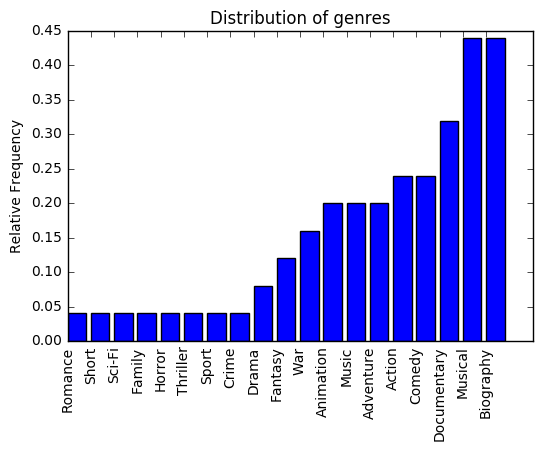

In [143]:
#fig=figsize(5,5)
ind=range(len(genre))
plt.bar(ind, np.array(sorted(dic.values()))/100.)
plt.xticks(ind, dic.keys(),rotation='vertical')
plt.ylabel("Relative Frequency")
plt.title("Distribution of genres")

# Insight 2: Genre  vs.  Average casting number

In this part, I calculated the average of the casting number for each genre first and then draw the distribution of of it. We can see that from the distribution, biography tend to have the largest aberage casting number. Horrer tend to have the smallest average casting number

In [115]:
dic_casting={}
for g in dic.keys():
    df_temp=imdb_movies[imdb_movies[g]==True]
    dic_casting[g]= df_temp['casting_num'].sum()*1./len(df_temp['casting_num'].notnull())
dic_casting

{'Action': 2.1818181818181817,
 'Adventure': 2.0,
 'Animation': 1.0,
 'Biography': 0.0,
 'Comedy': 1.2,
 'Crime': 1.2,
 'Documentary': 0.0,
 'Drama': 0.875,
 'Family': 3.0,
 'Fantasy': 2.5,
 'Horror': 0.0,
 'Music': 1.0,
 'Musical': 1.0,
 'Romance': 0.6666666666666666,
 'Sci-Fi': 1.3333333333333333,
 'Short': 0.0,
 'Sport': 0.0,
 'Thriller': 1.4,
 'War': 1.0}

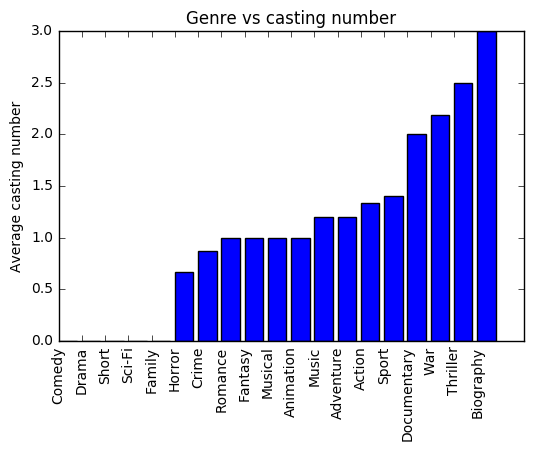

In [117]:
#fig=figsize(5,5)
ind=range(len(genre))
plt.bar(ind, sorted(dic_casting.values()))
plt.xticks(ind, dic_casting.keys(),rotation='vertical')
plt.ylabel("Average casting number")
plt.title("Genre vs casting number")

# Insight 3: Genre vs Average number of runtime

As we can see from the plot below, Thriller and biography seems to have the longest average runtime.

In [123]:
dic_runtime={}
for g in dic.keys():
    df_temp=imdb_movies[imdb_movies[g]==True]
    dic_runtime[g]=df_temp['runtime_avg'].sum()*1./len(df_temp['runtime_avg'].notnull())
dic_runtime

{'Action': 119.72727272727273,
 'Adventure': 114.54545454545455,
 'Animation': 55.666666666666664,
 'Biography': 79.0,
 'Comedy': 90.8,
 'Crime': 106.0,
 'Documentary': 95.0,
 'Drama': 102.0,
 'Family': 100.0,
 'Fantasy': 136.5,
 'Horror': 79.0,
 'Music': 100.0,
 'Musical': 140.0,
 'Romance': 84.83333333333333,
 'Sci-Fi': 93.16666666666667,
 'Short': 33.5,
 'Sport': 95.0,
 'Thriller': 103.2,
 'War': 125.0}

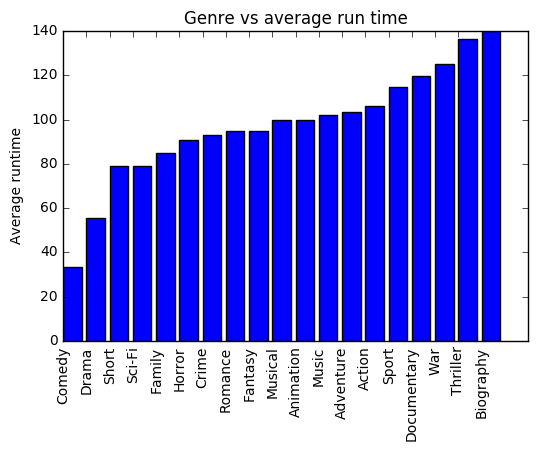

In [130]:
#fig=figsize(5,5)
ind=range(len(genre))
plt.bar(ind, sorted(dic_runtime.values()))
plt.xticks(ind, dic_casting.keys(),rotation='vertical')
plt.ylabel("Average runtime")
plt.title("Genre vs average run time")

# Insight 4: User rating

1. ** Distribution of user rating**: As we can see from the distribution plot, we found that the distribution is a little bit skewed. Most of movies has rating around 8 to 8.5.
2. ** Average User rating vs. genre **: As we can see from the distribution, it is obvious that comedy and drama seems to have the lowest user rating, whereas most of other genres have the similar ratings but not the same. They are all above 7 and less than 9.

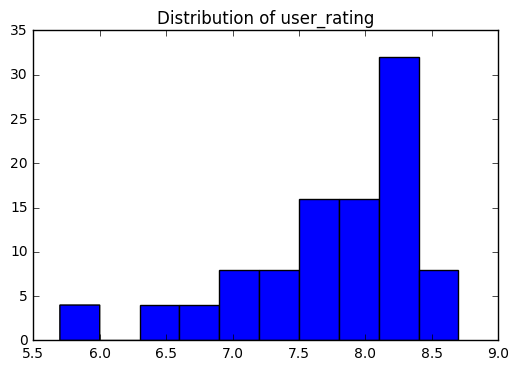

In [142]:
plt.hist(imdb_movies['user rating'].values, bins=10)
plt.title('Distribution of user_rating')

In [144]:
dic_rating={}
for g in dic.keys():
    df_temp=imdb_movies[imdb_movies[g]==True]
    dic_rating[g]=df_temp['user rating'].sum()*1./len(df_temp['user rating'].notnull())
dic_rating

{'Action': 7.636363636363639,
 'Adventure': 7.7636363636363654,
 'Animation': 7.933333333333333,
 'Biography': 5.7,
 'Comedy': 7.399999999999999,
 'Crime': 7.479999999999999,
 'Documentary': 7.8,
 'Drama': 7.424999999999998,
 'Family': 8.1,
 'Fantasy': 8.075,
 'Horror': 5.7,
 'Music': 6.9,
 'Musical': 8.0,
 'Romance': 7.3166666666666655,
 'Sci-Fi': 7.949999999999998,
 'Short': 7.8500000000000005,
 'Sport': 7.8,
 'Thriller': 7.299999999999999,
 'War': 7.0}

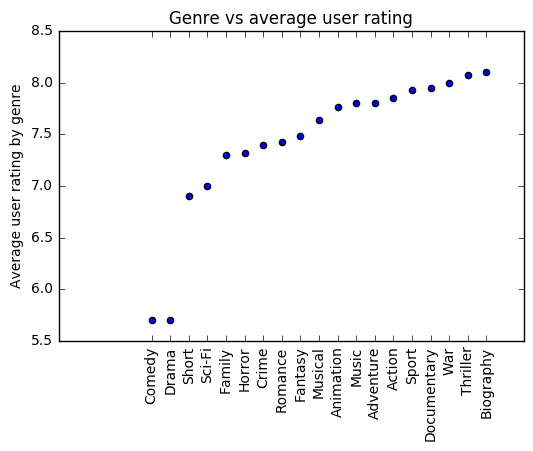

In [149]:
ind=range(len(genre))
plt.scatter(ind, sorted(dic_rating.values()))
plt.xticks(ind, dic_casting.keys(),rotation='vertical')
plt.ylabel("Average user rating by genre")
plt.title("Genre vs average user rating")

# Major problems

1. The major problem here is that the value of each covariate here is not a single value. Instead, there are lists of values for each cell of the data frame. This could be very difficult for us to do exploratory data analysis. Also, it would very hard to fit machine learning models on the existing model. So we should do some pre-data processing to deal with this issue. 
2. There are several ways that we came up with to deal with this multi-value cell issue. 
   * The first one is that we create new indicator variables. For example, the value of the variable "country" may have more than one values. According to the data, we found that most of the movie comes from the US. So we set a new indicator variable indicating whether this movies is from US. In addition, we could set a indicator variable called "global", indicate whether this movie is produced by multi-countries. 
   * The second one is to choose some of the variables in multi-value value covariates. For example, we have the casting column having lots of actors/actress. Since from the documentation, every list here is ordered by the importance of the casting. So we may set the threshold of the number of the casting we want later.
3. **Correlated covariates**: There are lots of covariates in the dataset, that are highly correlated. For example, the "casting" and "casting by" are actually the same. So we may next examine the highly correlated covariates.

# Future work
1. We should come up a way to quantify the label dependency. That is, we should find a way to measure the dependence between each labels. We may want to generate a occurrence matrix to try to see the related labels.